In [25]:
import pandas as pd
df = pd.read_csv('douyin_trend.csv')
df.head()

,rank_date,follower_count,add_follower_count,total_favorited,add_total_favorited,aweme_count,works_count
0,2020-03-26,17015000,-6000.0,46441000,4000.0,71,0.0
1,2020-03-27,17010000,-5000.0,46445000,4000.0,71,0.0
2,2020-03-28,17004000,-6000.0,46450000,5000.0,71,0.0
3,2020-03-29,17004000,0.0,46470000,20000.0,71,0.0
4,2020-03-30,17025000,21000.0,46828000,358000.0,72,1.0


In [26]:
#将rank_data列转为时间序列类型
df['rank_date'] = pd.to_datetime(df['rank_date'])
#将date列作为原数据的行索引
df.set_index(df['rank_date'], inplace=True)
df.drop(labels='rank_date', axis=1, inplace=True)
df.head()

,follower_count,add_follower_count,total_favorited,add_total_favorited,aweme_count,works_count
rank_date,,,,,,
2020-03-26,17015000,-6000.0,46441000,4000.0,71,0.0
2020-03-27,17010000,-5000.0,46445000,4000.0,71,0.0
2020-03-28,17004000,-6000.0,46450000,5000.0,71,0.0
2020-03-29,17004000,0.0,46470000,20000.0,71,0.0
2020-03-30,17025000,21000.0,46828000,358000.0,72,1.0


In [27]:
from pyecharts.charts import Line
line = Line()
labels = []
for x in df.rank_date:
    labels.append(x)
sizes = []
for y in df.follower_count:
    sizes.append(y)
line.add_xaxis(labels)
line.add_yaxis("粉丝总量", sizes)
line.render()


AttributeError: 'DataFrame' object has no attribute 'rank_date'

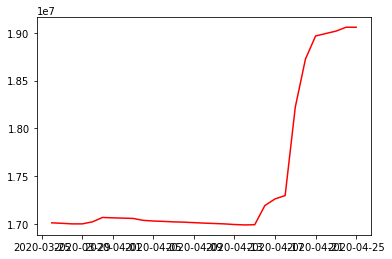

In [8]:
#粉丝总量
import matplotlib.pyplot as plt
plt.plot(df.index,df['follower_count'],c='red')

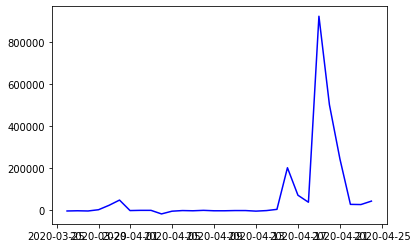

In [9]:
#粉丝增量
plt.plot(df.index,df['add_follower_count'],c='blue')

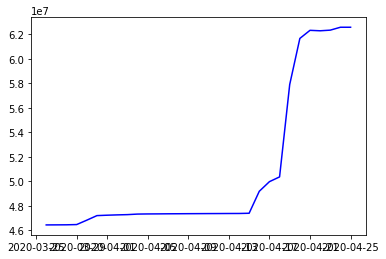

In [10]:
#获赞总量
plt.plot(df.index,df['total_favorited'],c='blue')

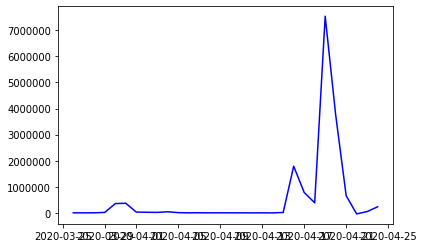

In [11]:
#获赞增量
plt.plot(df.index,df['add_total_favorited'],c='blue')

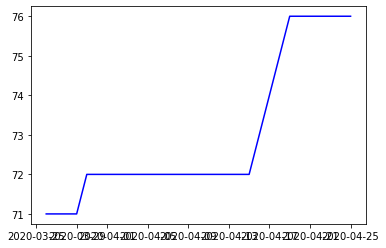

In [12]:
#作品总量
plt.plot(df.index,df['aweme_count'],c='blue')

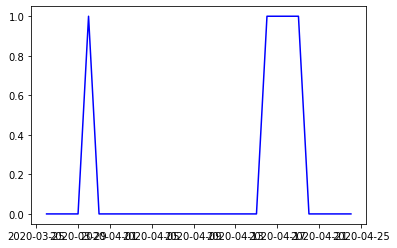

In [13]:
#作品增量
plt.plot(df.index,df['works_count'],c='blue')

In [1]:
import pandas as pd
dp = pd.read_csv('douyin_fans_age.csv')
dp.head()


,range,range_rate
0,18-23,40.57
1,<18,36.28
2,24-30,14.63
3,31-40,5.17
4,>50,2.31


In [2]:
dp.rename(columns={'range':'age_range'}, inplace = True)
dp.head()

,age_range,range_rate
0,18-23,40.57
1,<18,36.28
2,24-30,14.63
3,31-40,5.17
4,>50,2.31



Bad key "text.kerning_factor" on line 4 in
D:\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


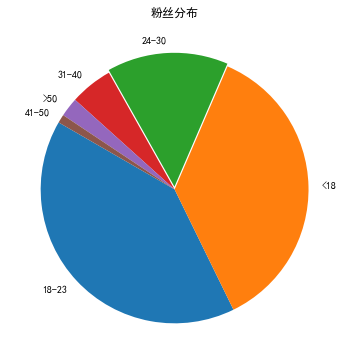

In [3]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.figure(figsize=(6,9)) #调节图形大小
explode = (0,0,0.02,0,0,0) #将某一块分割出来，值越大分割出的间隙越大
labels = []
for x in dp.age_range:
    labels.append(x)
sizes = []
for y in dp.range_rate:
    sizes.append(y)
plt.pie(sizes,explode=explode,labels=labels,shadow=False,startangle=150)
plt.title("粉丝分布")
plt.show()

In [31]:
dl = pd.read_csv('douyin_fans_range.csv')
dl.head()


,province,province_rate
0,广东,14.64
1,浙江,6.27
2,河南,5.97
3,江苏,5.77
4,四川,5.37


In [38]:
from pyecharts.charts import Bar
name_list  = []
for x_label in dl.province:
    name_list.append(x_label)
# name_list_eve = name_list[0:10]    
num_list  = []
for y_label in dl.province_rate:
    num_list.append(y_label)
# num_list_eve = num_list[0:10]

bar = Bar()
bar.add_xaxis(name_list)
bar.add_yaxis("地区分布占比",num_list)
# render 会生成本地 HTML 文件，默认会在当前目录生成 render.html 文件
# 也可以传入路径参数，如 bar.render("mycharts.html")
bar.render_notebook()

<function matplotlib.pyplot.show(*args, **kw)>

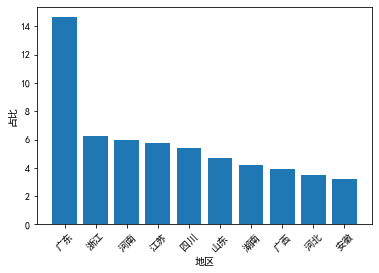

In [16]:

name_list  = []
for x_label in dl.province:
    name_list.append(x_label)
name_list_eve = name_list[0:10]    
num_list  = []
for y_label in dl.province_rate:
    num_list.append(y_label)
num_list_eve = num_list[0:10]

plt.xlabel('地区')
plt.ylabel('占比')
plt.xticks(rotation=45)
plt.bar(range(len(name_list_eve)),num_list_eve,tick_label=name_list_eve)
plt.show

